In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy
import csv
from scipy.stats import norm
import matplotlib.mlab as mlab
import scipy.stats as stats
import numpy as np

In [3]:
data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

In [21]:
sorted_x = sorted(list(set([r[0] for r in rows])))
sorted_y = sorted(list(set([r[1] for r in rows])))
sorted_z = sorted(list(set([r[2] for r in rows])))

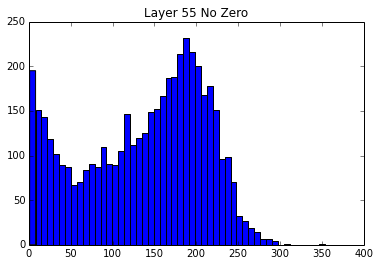

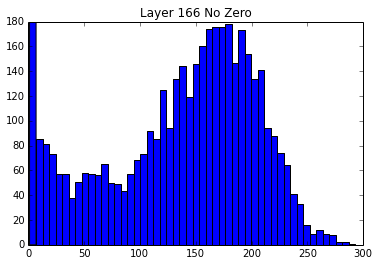

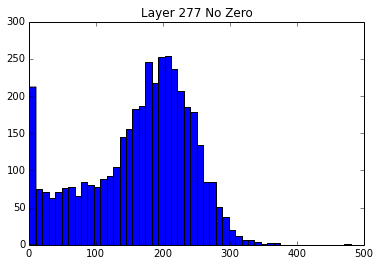

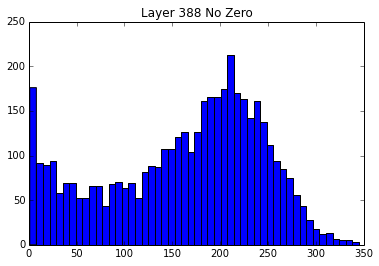

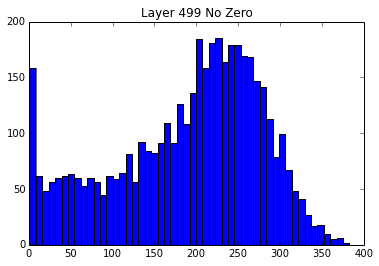

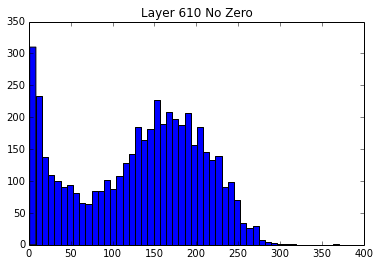

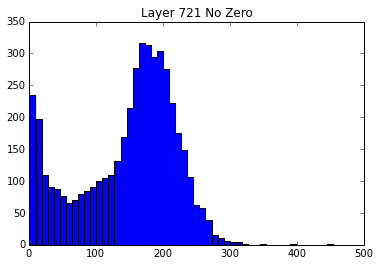

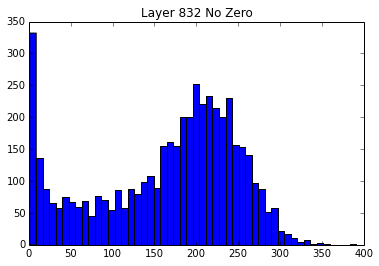

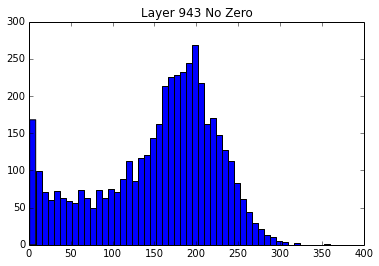

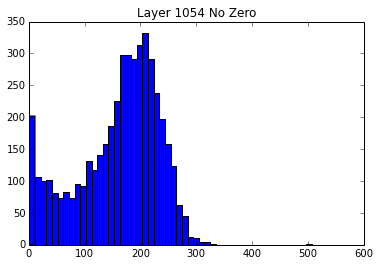

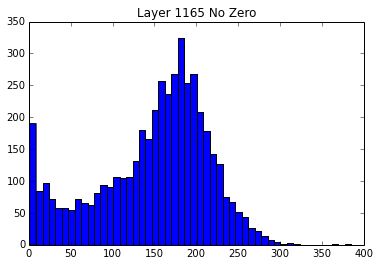

In [6]:
#z axis values = [55, 166, 277, 388, 499, 610, 721, 832, 943, 1054, 1165]

for i in sorted_z:
    unmaskedSynapsesNoZero = ([r[-1] for r in rows if r[-2] != 0 if r[-1] !=0 if r[2] == i])
    plt.hist(unmaskedSynapsesNoZero, bins=50)
    plt.title("Layer " + str(i) + " No Zero")
    plt.show()

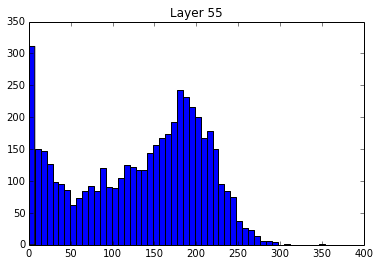

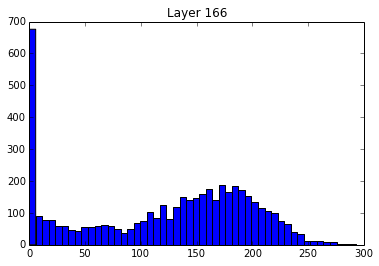

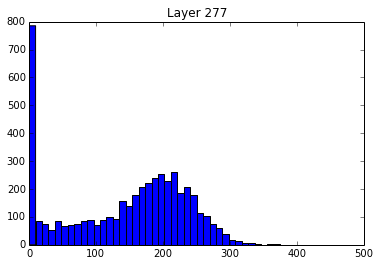

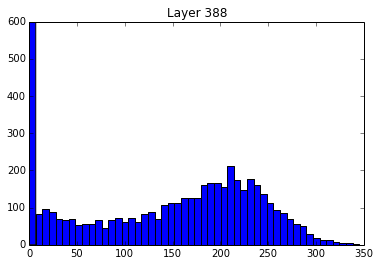

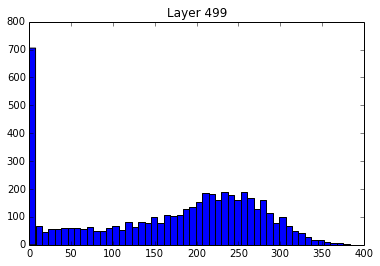

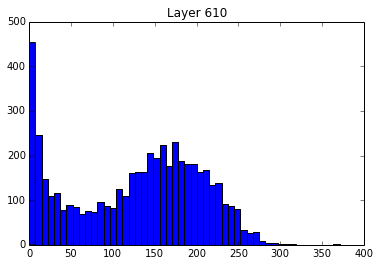

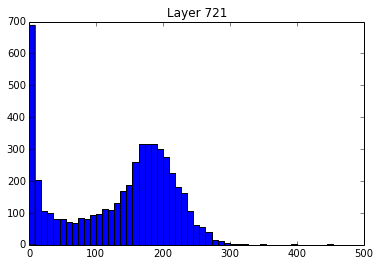

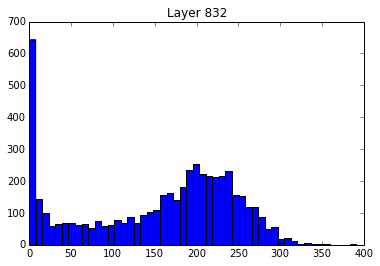

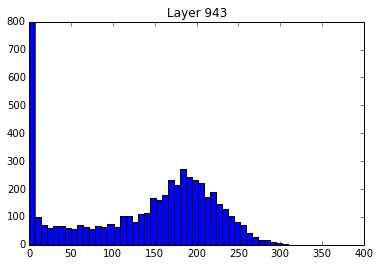

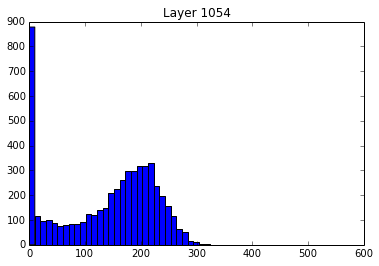

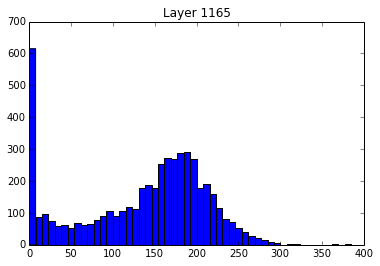

In [7]:
for i in sorted_z:
    unmaskedSynapses = ([r[-1] for r in rows if r[-2] != 0 if r[2] == i])
    plt.hist(unmaskedSynapses, bins=50)
    plt.title("Layer " + str(i))
    plt.show()

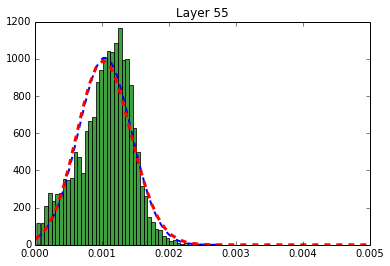

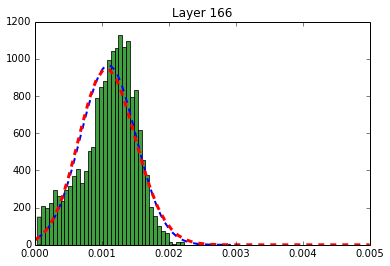

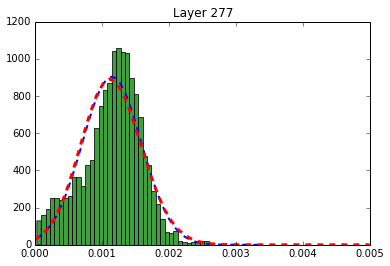

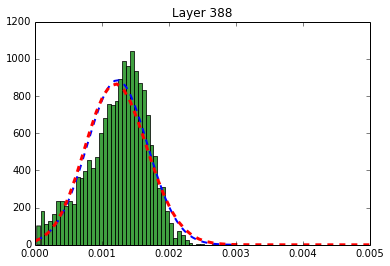

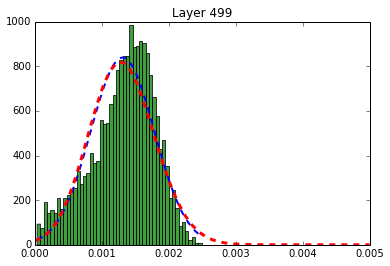

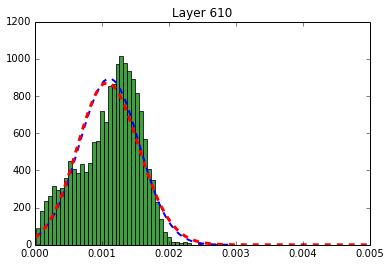

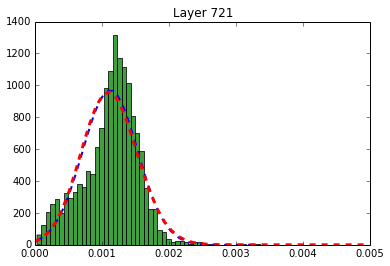

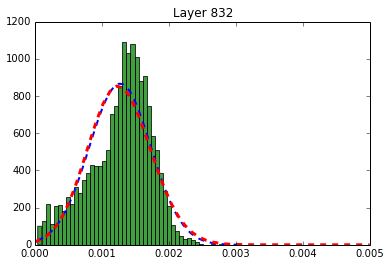

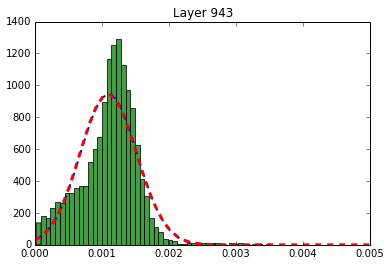

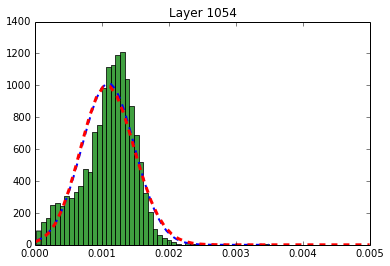

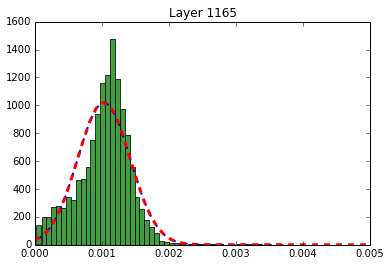

In [13]:
#take into account unmasked for each layer
#Both Gaussian and Gamma give somewhat nice curves



for i in sorted_z:
    s = []
    for r in rows:
        if r[-2] != 0:
            if r[-1] !=0:
                if r[2] == i:
                    s.append(float(r[-1])/float(r[-2]))
                    
    # the histogram of the data
    n, bins, patches = plt.hist(s, 50, normed=1, facecolor='green', alpha=0.75)
    
    #GAUSSIAN
    # best fit of data normal curve (gaussian)
    (mu, sigma) = norm.fit(s)
    # add a 'best fit' line
    y = mlab.normpdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'b--', linewidth=2)
    
    #GAMMA
    alpha, loc, beta=stats.gamma.fit(s)
    #print alpha, loc, beta
    rv = stats.gamma(alpha,loc,beta)
    x = np.linspace(0,.005)
    plt.plot(x, rv.pdf(x),'r--', lw=3)
    plt.title("Layer " + str(i))
    plt.show()

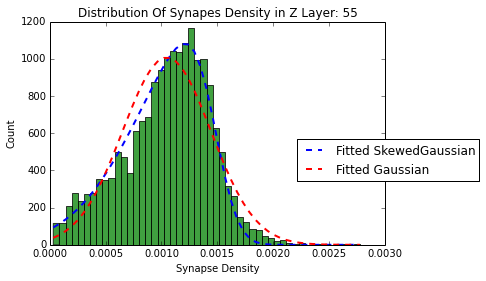

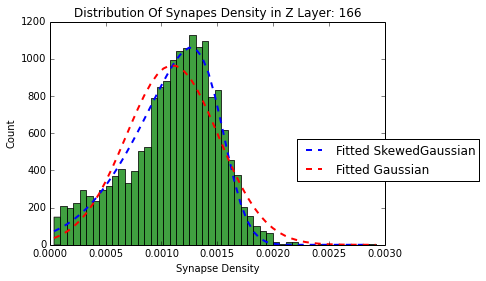

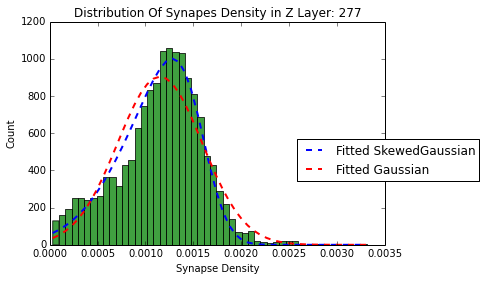

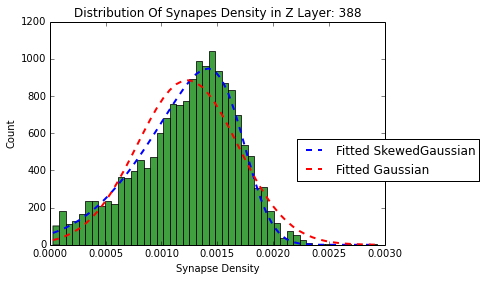

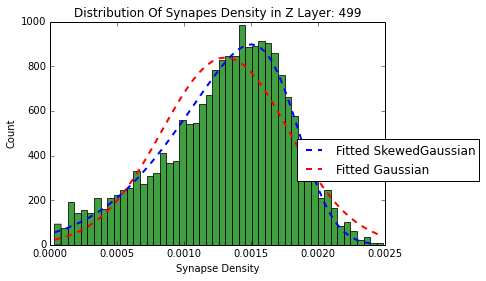

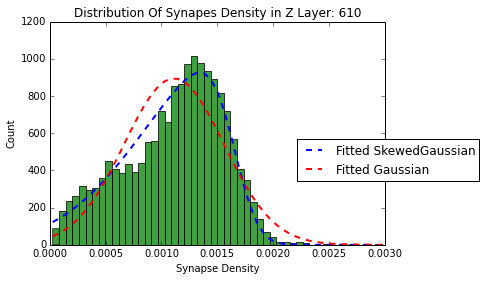

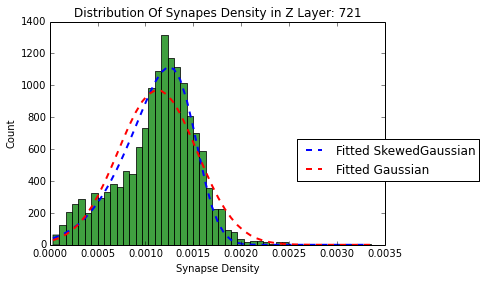

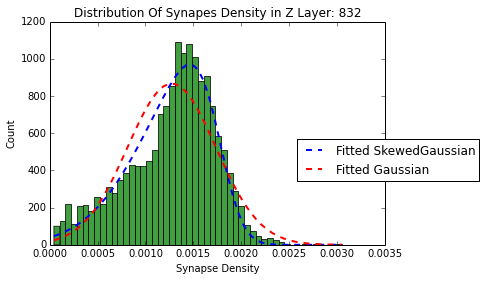

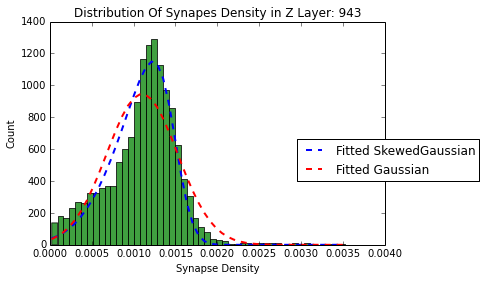

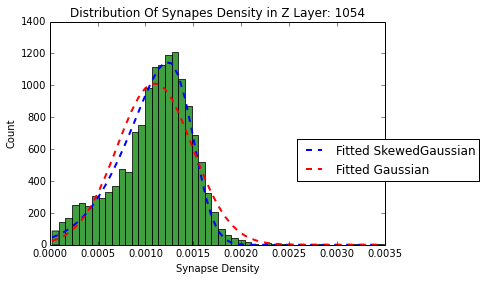

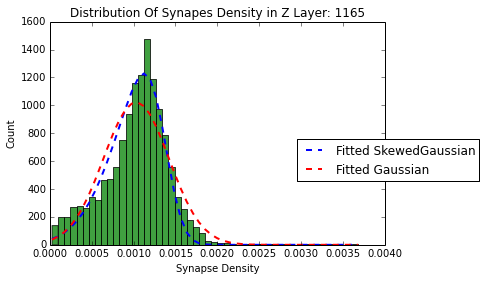

In [22]:
from lmfit.models import SkewedGaussianModel

for i in sorted_z:
    s = []
    for r in rows:
        if r[-2] != 0:
            if r[-1] !=0:
                if r[2] == i:
                    s.append(float(r[-1])/float(r[-2]))
                    
    # the histogram of the data
    n, bins, patches = plt.hist(s, 50, normed=1, facecolor='green', alpha=0.75)
    
    model = SkewedGaussianModel()
    params = model.make_params(amplitude=10, center=0, sigma=1, gamma=0)

    # adjust parameters  to best fit data.
    result = model.fit(n, params, x=bins[:50])

    #print(result.fit_report())
    #pylab.plot(xvals, yvals)
    plt.plot(bins[:50], result.best_fit, 'b--', linewidth=2) 
    
    #GAUSSIAN
    # best fit of data normal curve (gaussian)
    (mu, sigma) = norm.fit(s)
    # add a 'best fit' line
    y = mlab.normpdf( bins, mu, sigma)
    
    l = plt.plot(bins, y, 'r--', linewidth=2)
    plt.title("Distribution Of Synapes Density in Z Layer: "+ str(i))
    plt.xlabel("Synapse Density")
    plt.ylabel("Count")
    plt.legend(['Fitted SkewedGaussian', 'Fitted Gaussian'], loc='upper right',bbox_to_anchor=(1.3, 0.5))
    plt.show()